<h1 align="center">INF280 - Laboratorio de Estadística Computacional</h1>
<center>
<img src="https://prod-discovery.edx-cdn.org/media/course/image/381a0046-5d78-4790-8776-74620d59f48e-b5fbe38528ea.small.png" width="40%"></img>

<h2 align="center">LEC 3: Distribuciones y Variables Aleatorias</h2>

<i> Notebook creado por Sebastián Bórquez G. - <a href="mailto://sebastian.borquez.g@gmail.com">sebastian.borquez.g@gmail.com</a> - DI UTFSM - Diciembre 2019.</i>
</center>


# Objetivo

Aprender a utilizar la herramienta de estadística para el análisis de datos.

## Instrucciones

* Los informes deben ser desarrollados en parejas definidas al comienzo del semestre. Cualquier cambio debe ser informado previamente al ayudante para su autorización.
* El informe consiste en el desarrollo de este notebook. Completando código donde sea indicado y respondiendo las preguntas planteadas.
* Debe argumentar sus respuestas basándose en los resultados obtenidos en sus experimentos. De no ser así, no podrán optar al puntaje máximo de la pregunta.
* Los gráficos deben ser legibles y fáciles de entender. Esto es utilizar el gráfico adecuado al problema; usar escalas correctas; incluir títulos, nombres de ejes y leyenda.
* El código debe ser legible, comente de manera adecuada y evite la modularización (_simple is better than complex - [The Zen of Python](https://www.python.org/dev/peps/pep-0020/#id3)_)
* Cualquier consulta o queja debe realizarse a través de la plataforma Moodle.
* La fecha de entrega es el **Domingo 16 de Febrero a las 23:55**.
* El formato de entrega es **GrupoXX_LECN.ipynb**, donde _XX_ es grupo asignado y _N_ el LEC correspondiente. (i.e Grupo03_LEC1.ipynb) 
* Por cada día de atraso se descuentan 10 puntos de la nota máxima a alcanzar.
* Los trabajos que sean resultado de copia o plagio de otros trabajos, serán automáticamente evaluados con nota 0.

## Aprendizaje Esperado

Los y las estudiantes deben ser capaces de:

* Utilizar las herramientas básicas de distribuciones y variables aleatorias. (Python o R-Project).

* Ser capaces de identificar y utilizar adecuadamente, las distintas métricas y medidas entre distribuciones.

* Ser capaces de realizar un análisis comparativos entre gráficos y resultados obteniendo conclusiones que se infieren de este mismo análisis.

## Actividad

Lea las siguientes preguntas y responda de manera clara y precisa. Algunas de estas requieren de completar o implementar funciones, no edite funciones si no se les indica. 

El puntaje máximo es de 100, cada pregunta indica su puntaje asignado.

### Información del Grupo






| Rol| Nombre | Correo |
| ---------- | ---------- | ---------- |
| COMPLETAR  | COMPLETAR   | COMPLETAR |
| COMPLETAR   | COMPLETAR  | COMPLETAR |



## Distribution Distances

<center>
<img src="https://jeremykun.files.wordpress.com/2018/03/screen-shot-2018-03-03-at-6-11-00-pm.png?w=1800" width="80%"></img>


</center>

La noción de [distancia estadística](https://en.wikipedia.org/wiki/Statistical_distance) junto con sus propiedades constituyen
una importante herramienta, tanto en la estadística matemática como en el
análisis de datos. Nos permite realizar contraste de hipótesis, estudiar propiedades asintóticas de estimadores, comparar parámetros, etc. También nos da una herramienta intuitiva para obtener representaciones geométricas, fáciles de entender, para el análisis e interpretación de la estructura de los datos.

En este laboratorio, exploraremos distintas distancias y divergencias entre distribuciones de probabilidad continuas, determinaremos cuales son las ventajas y desventajas de cada uno.

* (<font color='red'>12 Puntos</font>) Defina el concepto de **distancia** (o métrica) $d(a,b)$. ¿Cuáles son sus condiciones? ¿En qué se diferencia una distancia con una medida de **divergencia**?



**Respuesta**


<font color="greed"> COMPLETAR </font> 


In [0]:
from scipy import stats
import numpy as np
from numpy.linalg import norm

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import skimage

%matplotlib inline

### Distribuciones

Las distancias y divergencias tienen comportamientos singulares con ciertos casos, a continuación generaremos una variedad de distribuciones (``rv_frozen``) que utilizaremos para evaluar.


* (<font color='red'>8 Puntos</font>) Genere las distribuciones que se encuentran en la lista a continuación, luego gráfiquelas (su pdf) juntas en el rango ``[a, b]``.


  * $ X_1 \sim N(\mu=0, \sigma=1)$ 
  * $ X_2 \sim N(\mu=2, \sigma=1)$ 
  * $ X_3 \sim N(\mu=8, \sigma=1)$ 
  * $ X_4 \sim N(\mu=8, \sigma=0.75)$ 
  * $ X_5 \sim N(\mu=15, \sigma=1)$ 
  * $ X_6 \sim N(\mu=15, \sigma=2.5)$ 
  * $ X_7 \sim Ga(\alpha=5, \beta=0.625)$ 
  * $ X_8 \sim Ga(\alpha=1.5, \beta=0.75)$ 


**nota 1:** Recordar que Gamma usa ``scale`` como $k$, donde  $k = 1/\beta$

**nota 2:** Para comprobar que generó las distribuciones correctas, recomiendo calcular la media y varianza empirica y compararla con la teórica.



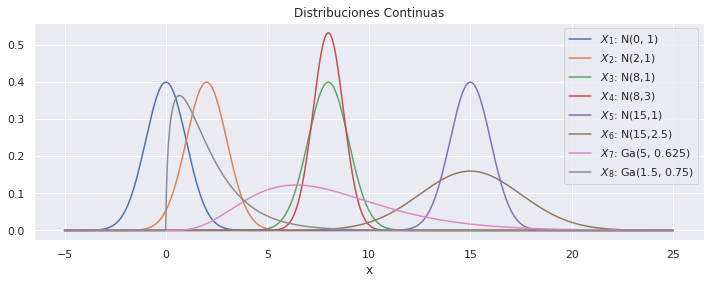

In [2]:
# Rango
a = -5
b = 25

# Variables Aleatorias
X_1 = stats.norm(0, 1)
X_2 = stats.norm(2, 1)
X_3 = stats.norm(8, 1)
X_4 = stats.norm(8, 0.75) 
X_5 = stats.norm(15, 1)
X_6 = stats.norm(15, 2.5)
X_7 = stats.gamma(a=0.625*8, scale=1/0.625)
X_8 = stats.gamma(a=0.75*2, scale=1/.75)

# Contenedores para facilitar manipulacion
Xs = [X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8]
keys = ["N(0, 1)","N(2,1)","N(8,1)","N(8,3)","N(15,1)","N(15,2.5)","Ga(5, 0.625)","Ga(1.5, 0.75)"]
distributions = {f"X_{i+1}: {k}":X for i, (X, k) in enumerate(zip(Xs, keys))}
 
# Generar puntos
x = np.linspace(a,b, 1500)

# Generar figura
plt.figure(figsize=(12,4))

# Generar probabilidades para Normal y Gamma
for i, (X, k) in enumerate(zip(Xs, keys)):
  plt.plot(x, X.pdf(x), label=f"$X_{i+1}$: {k}")

# Agregar estilo
plt.title("Distribuciones Continuas")
plt.xlabel("x")
plt.legend()
plt.show()

### Comparar Medias


La primera candidata a métrica será la diferencia entre medias, está la definiremos de la siguiente forma:

Sea $d_{\text{mean}}(P, Q)$ la distancia de medias entre $P$ y $Q$. Donde $P$ y $Q$ dos distribuciones continuas, $\mu_P$ y $\mu_Q$ sus valores de media.


$$d_{\text{mean}}(P, Q) = |\mu_P - \mu_Q|$$


* (<font color='red'>4 Puntos</font>) Implemente la función ``distance_mean(P, Q, round=2)``, para calcular la distancia entre dos distribuciones.

In [0]:
def distance_mean(P, Q, decimals=2, a=a, b=b):
    """
    distance_mean calcula la diferencia entre las dos distribucione P y Q. 
    Luego redondea el resultado a un numero dado de decimales.
    
    Args:
      P (rv_frozen):  distribucion continua.
      Q (rv_frozen):  distribucion continua. 
      round (int):    cifras decimales para aproximar.
      a, b:           rango donde está definida la distancia.   
    Return:
      d:    diferencia entre las medias.
    """

    mu_p = P.mean()
    mu_q = Q.mean()

    d = abs(mu_p - mu_q)

    return round(d, decimals)

* (<font color='red'>3 Puntos</font>) Complete el siguiente código para mostrar el resultado de ``distance_mean``.

In [4]:
def show_distance(P, Q, distance, decimals=2, a=a, b=b, show_means=False):
    # Calcular distance_mean
    d = distance(P, Q, decimals, a, b)
    mu_P = P.mean()
    mu_Q = Q.mean()

    # Generar puntos
    x = np.linspace(a,b, 500)

    # Generar figura
    plt.figure(figsize=(12,4))

    # Generar probabilidades para distribuciones
    plt.plot(x, P.pdf(x), label="P")
    plt.vlines(mu_P, 0, P.pdf(mu_P), "g", lw=2, alpha=0.75, label=f"$\mu_P=${mu_P}")

    plt.plot(x, Q.pdf(x), label="Q")
    plt.vlines(mu_Q, 0, Q.pdf(mu_Q), "r", lw=2, alpha=0.75, label=f"$\mu_Q=${mu_Q}")
    
    # Dibujar la distancia
    if show_means:
        y_d = min(P.pdf(mu_P), Q.pdf(mu_Q)) / 2.
        x1_d, x2_d = sorted([mu_P, mu_Q])
        plt.hlines(y_d, x1_d, x2_d, linestyles ="dashed", label=f"d(P,Q)={d}")

    # Agregar estilo
    plt.title(f"Comparando Distribuciones\nd(P,Q)={d}")
    plt.xlabel("x")
    plt.legend()
    plt.show()

interact(show_distance, P=distributions, Q=distributions, 
         distance=fixed(distance_mean), decimals=(1,6,1), 
         a=fixed(a), b=fixed(b), show_means=fixed(True));

interactive(children=(Dropdown(description='P', options={'X_1: N(0, 1)': <scipy.stats._distn_infrastructure.rv…

* (<font color='red'>6 Puntos</font>) ¿Es la medida ``distance_mean``  una medida de distancia adecuada? ¿Por qué? (ejemplifique con casos)


**Respuesta**


<font color="greed"> COMPLETAR </font> 


### Kolmogorov Smirnov Test

La prueba de [Kolmogorov Smirnov](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) es otra métrica que se utiliza para comparar dos hipótesis. Está definida para dos distribuciones $P$ y $Q$ en el intervalo $[a,b]$ como:

$$d_{KS}(P, Q) = sup_{x \in [a,b]}(|F_P(x) - F_Q(x)|)$$

Donde **sup** es el supremo en el intervalo, $F_P$ y $F_Q$ son las Cdf de las distribuciones $P$ y $Q$ respectivamente.

* (<font color='red'>4 Puntos</font>) Implemente la función ``KS_test(P, Q, round=2)``, para calcular la distancia entre dos distribuciones.



In [5]:
def KS_test(P, Q, decimals=2, a=a, b=b, return_data=False):
    """
    KS_test calcula la distancia entre las dos distribucione P y Q. 
    Luego redondea el resultado a un numero dado de decimales.
    
    Args:
      P (rv_frozen):  distribucion continua.
      Q (rv_frozen):  distribucion continua. 
      round (int):    cifras decimales para aproximar.
      a, b:           rango donde está definida la distancia.
      return_data (bool): retornar cdf y valores auxiliares
      
    Return:
      d:    distancia entre las distribuciones.
    """

    # Generamos dominio
    x = np.linspace(a, b, 1501)

    # Calculamos Probabilidades
    F_P = np.round(P.cdf(x), 5)
    F_Q = np.round(Q.cdf(x), 5)

    # DEBUG usa este print para saber si lo estas calculando correctamente
    #rvs1 = P.rvs(size=10000)
    #rvs2 = Q.rvs(size=10000)
    #print(stats.ks_2samp(rvs1, rvs2)[0])

    d = np.abs(F_P - F_Q)

    # Argumento donde se encuentra el supremo
    x_max = np.argmax(np.round(d, decimals))

    # Supremo
    d =  max(np.round(d, decimals))

    if return_data:
        return (d, (F_P, F_Q, x, x_max, d))
    return d


@interact(P=distributions, Q=distributions, distance=fixed(KS_test), decimals=(1,6,1), a=fixed(a), b=fixed(b))
def plus_show_distance(P, Q, distance, decimals=2):
    show_distance(P, Q, distance, decimals, a, b, show_means=False)

    # Graficar CDF    
    plt.figure(figsize=(12,4))
    d, (F_P, F_Q, x, x_max, d) = KS_test(P, Q, decimals, a, b, True)

    plt.plot(x, F_P, label="$F_P(x)$")
    plt.plot(x, F_Q, label="$F_Q(x)$")

    y_min, y_max = sorted([F_P[x_max], F_Q[x_max]])
    plt.vlines(x[x_max], y_min, y_max, linestyles ="dashed", label=f"d(P,Q)={d}")

    plt.title("CDF")
    plt.legend()
    plt.show()

interactive(children=(Dropdown(description='P', options={'X_1: N(0, 1)': <scipy.stats._distn_infrastructure.rv…

### Hellinger Distance

La [distancia de Hellinger](https://en.wikipedia.org/wiki/Hellinger_distance) es otra medida para cuantificar la similaridad entre dos distribuciones.  Está definida para dos distribuciones $P$ y $Q$ en el intervalo $[a,b]$ como:

$$d_{\text{hellinger}}(P, Q) = \frac{1}{\sqrt{2}}\sqrt{\int_a^b \left( \sqrt{f_P(x)} - \sqrt{f_Q(x)} \right)dx^2} \approx \frac{1}{\sqrt{2}} || \sqrt{f'_P} - \sqrt{f'_Q} ||_2$$

Donde $|| x ||_2$ es la norma euclidiana, $f'_P$ y $f'_Q$ son las aproximaciones discretas normalizadas, en su forma de vectorial.

* (<font color='red'>4 Puntos</font>) Implemente la función ``hellinger(P, Q, round=2)``, para calcular la distancia de hellinger entre dos distribuciones.

In [6]:
def hellinger(P, Q, decimals=2, a=a, b=b):
    """
    hellinger calcula la distancia de hellinger entre las dos distribucione P y Q. 
    Luego redondea el resultado a un numero dado de decimales.
    
    Args:
      P (rv_frozen):  distribucion continua.
      Q (rv_frozen):  distribucion continua. 
      round (int):    cifras decimales para aproximar.
      a, b:           rango donde está definida la distancia.
      
    Return:
      d:    entropia entre las distribuciones.
    """
    # Generamos dominio
    x = np.linspace(a,b, 1501)

    # Calculamos Probabilidades
    f_P = np.round(P.pdf(x), 5)
    f_Q = np.round(Q.pdf(x), 5)

    # Normalizamos
    f_P /= sum(f_P)
    f_Q /= sum(f_Q)

    # DEBUG: no hay implementacion en scipy, pero se obtienen valores similares a KS_test

    # Calculamos KL
    d = (1/np.sqrt(2))* norm(np.sqrt(f_P) - np.sqrt(f_Q))

    return round(d, decimals)

interact(show_distance, P=distributions, Q=distributions, 
         distance=fixed(hellinger), decimals=(1,6,1), 
         a=fixed(a), b=fixed(b), show_means=fixed(False));

interactive(children=(Dropdown(description='P', options={'X_1: N(0, 1)': <scipy.stats._distn_infrastructure.rv…

### Wasserstein Distance

La distancia de [Wasserstein](https://en.wikipedia.org/wiki/Wasserstein_metric), también conocida como la **earth mover's distance**, surge del problema de optimización **optimal transport problem**. Intuitivamente, si cada distribución se ve como una cantidad unitaria de "tierra" acumulada, la métrica es el "costo" mínimo de convertir una pila en la otra, que se supone que es la cantidad de tierra que necesita ser movido por la distancia media que tiene que ser movido.
Está definida para dos distribuciones $P$ y $Q$ en el intervalo $[a,b]$ como:

$$d_{w}(P, Q) = \int_a^b|F_P(x) - F_Q(x)|dx$$

Donde $F_P$ y $F_Q$ son las Cdf de las distribuciones $P$ y $Q$ respectivamente.


* (<font color='red'>4 Puntos</font>) Implemente la función ``wasserstein(P, Q, round=2)``, para calcular la distancia entre dos distribuciones.


In [7]:
from scipy.integrate import simps as integrate
    
def wasserstein(P, Q, decimals=2,  a=a, b=b, return_data=False):
    """
    wasserstein calcula la distancia de wasserstein entre las dos distribucione P y Q. 
    Luego redondea el resultado a un numero dado de decimales.
    
    Args:
      P (rv_frozen):  distribucion continua.
      Q (rv_frozen):  distribucion continua. 
      round (int):    cifras decimales para aproximar.
      a, b:           rango donde está definida la distancia.
      return_data (bool): retornar cdf y valores auxiliares

    Return:
      d:    entropia entre las distribuciones.
    """

    # Generamos dominio
    x = np.linspace(a,b, 1501)

    # Calculamos Probabilidades
    F_P = np.round(P.cdf(x), 5)
    F_Q = np.round(Q.cdf(x), 5)

    # DEBUG usa este print para saber si lo estas calculando correctamente
    #rvs1 = np.round(P.rvs(size=100000),3)
    #rvs2 = np.round(Q.rvs(size=100000),3)
    #print(stats.wasserstein_distance(rvs1, rvs2))

    # Usa integrate(f(x), x) para integrar usando arrays con los valores de la funcion y  de x
    d = integrate(np.abs(F_P - F_Q), x)

    if return_data:
        return (d, (F_P, F_Q, x))
    return d


@interact(P=distributions, Q=distributions, distance=fixed(wasserstein), decimals=(1,6,1), a=fixed(a), b=fixed(b), )
def plus_show_distance(P, Q, distance, decimals=2):
    show_distance(P, Q, distance, decimals, a, b, show_means=False)

    # Graficar CDF    
    plt.figure(figsize=(12,4))
    d, (F_P, F_Q, x) = wasserstein(P, Q, decimals, a, b, True)

    plt.plot(x, F_P, label="$F_P(x)$")
    plt.plot(x, F_Q, label="$F_Q(x)$")

    # Pintar area integrada
    plt.fill_between(x, F_Q, F_P, alpha=0.75)
    
    plt.title("CDF")
    plt.legend()
    plt.show()

interactive(children=(Dropdown(description='P', options={'X_1: N(0, 1)': <scipy.stats._distn_infrastructure.rv…

#### Escogiendo la distancia correcta

Ejecute el siguiente bloque, luego responda las preguntas.


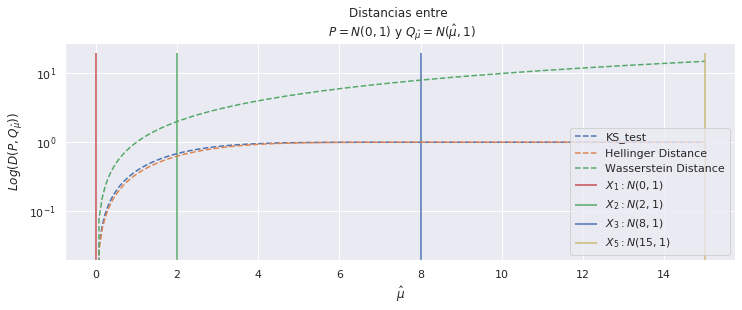

In [8]:
mus = np.linspace(0, 15, 200)

P = X_1
Q_mu = lambda mu: stats.norm(mu, 1)

ks_values = [KS_test(P, Q_mu(mu), decimals=4) for mu in mus]
hellinger_values = [hellinger(P, Q_mu(mu), decimals=4) for mu in mus]
wasserstein_values = [wasserstein(P, Q_mu(mu), decimals=4) for mu in mus]

# Graficar CDF    
plt.figure(figsize=(12,4))

plt.plot(mus, ks_values, "--", label="KS_test")
plt.plot(mus, hellinger_values,"--", label="Hellinger Distance")
plt.plot(mus, wasserstein_values,"--", label="Wasserstein Distance")

plt.vlines(0, 0, 20, "r",label="$X_1: N(0,1)$")
plt.vlines(2, 0, 20, "g", label="$X_2: N(2,1)$")
plt.vlines(8, 0, 20, "b", label="$X_3: N(8,1)$")
plt.vlines(15,0, 20, "y", label="$X_5: N(15,1)$")

plt.title("Distancias entre \n $P=N(0,1)$ y $Q_{\hat{\mu}}=N(\hat{\mu}, 1)$")
plt.legend()
plt.xlabel("$\hat{\mu}$")
plt.ylabel("$Log(D(P, Q_{\hat{\mu}}))$")
plt.yscale('log')
plt.show()

* (<font color='red'>4 Puntos</font>) ¿Qué problema presentan las distancia *Kolmogorov Smirnov Test* y la *distancia de Hellinger* y qué implica esto al comparar dos distribuciones? ¿Cuáles son los casos problemáticos?


* (<font color='red'>4 Puntos</font>) ¿Cuáles son las ventajas de wasserstein frente a las demás distribuciones? ¿Cuáles podrían ser sus limitaciones?


**Respuesta**


<font color="greed"> COMPLETAR </font> 


### Caso de uso: Clustering de Imagenes

Usaremos la distancia entre distribuciones para realizar una clusterización de imágenes de imágenes utilizando su histograma de [luminosidad](https://en.wikipedia.org/wiki/YUV) (canal Luma).

Como dataset usaremos un sub conjunto de este [repositorio](https://github.com/ml5js/ml5-data-and-models/tree/master/datasets/images/landscapes).

Suba el archivo ``images.zip`` que se encuentra en moodle a la carpeta de este notebook.





In [9]:
!rm -r images.zip images

rm: cannot remove 'images.zip': No such file or directory
rm: cannot remove 'images': No such file or directory


In [10]:
import os
from os.path import join
import pandas as pd
from tqdm import tqdm_notebook
from skimage import io, color
import zipfile


# https://pypi.org/project/pyclustertend/
def pairwise_distances(X):
    """
    X : list of measurable objects.
    """
    distances = []
    for P in X:
        distances_xi = []
        for Q in X:
            distances_xi.append(wasserstein(P, Q, 4, 0, 1))
        distances.append(distances_xi)

    return np.array(distances)

def ordered_dissimilarity_matrix(X):
    """The ordered dissimilarity matrix is used by visual assesement of tendency. It is a just a a reordering 
    of the dissimilarity matrix.
    Parameters
    ----------
    X : list of measurable objects.

    Return
    -------
    ODM : matrix
        the ordered dissimalarity matrix .
    """

    # Step 1 :

    I = []

    R = pairwise_distances(X)
    P = np.zeros(R.shape[0], dtype="int")

    argmax = np.argmax(R)

    j = argmax % R.shape[1]
    i = argmax // R.shape[1]

    P[0] = i
    I.append(i)

    K = np.linspace(0, R.shape[0] - 1, R.shape[0], dtype="int")
    J = np.delete(K, i)

    # Step 2 :

    for r in range(1, R.shape[0]):

        p, q = (-1, -1)

        mini = np.max(R)

        for candidate_p in I:
            for candidate_j in J:
                if R[candidate_p, candidate_j] < mini:
                    p = candidate_p
                    q = candidate_j
                    mini = R[p, q]

        P[r] = q
        I.append(q)

        ind_q = np.where(np.array(J) == q)[0][0]
        J = np.delete(J, ind_q)

    # Step 3

    ODM = np.zeros(R.shape)

    for i in range(ODM.shape[0]):
        for j in range(ODM.shape[1]):
            ODM[i, j] = R[P[i], P[j]]

    # Step 4 :
    return ODM, P


def ivat(dataset, return_ODM=False, figuresize=(12, 12)):
    """VAT means Visual assesement of tendency. basically, it allow to asses cluster tendency
    through a map based on the dissimiliraty matrix. 

    iVat return a visualisation based on the Vat but more reliable and easier to 
    interpret.

    Parameters
    ----------
    X : matrix
        numpy array
    return_ODM : return the Ordered Dissimalirity Matrix
        boolean (default to False)
    figuresize : size of the VAT.
        tuple (default to (10,10))
    Return
    -------
    ODM : matrix
        the ordered dissimalarity matrix plotted.
    """

    from random import shuffle
    dataset = list(dataset)
    shuffle(dataset)

    X = [data[3] for data in dataset] #Extract histogram
    
    #vat
    D, P = ordered_dissimilarity_matrix(X)
    
    #ivat
    D_prim = np.zeros((D.shape[0], D.shape[0]))
    for r in range(1, D.shape[0]) :
        # Step 1 : find j for which D[r,j] is minimum and j in [1:r-1]
        j = np.argmin(D[r,0:r])

        # Step 2 : 
        D_prim[r,j] = D[r,j]

        # Step 3 : pour c : 1,r-1 avec c !=j 
        c_tab = np.array(range(0,r))
        c_tab = c_tab[ c_tab != j]

        for c in c_tab : 
            D_prim[r,c] = max(D[r,j], D_prim[j,c])
            D_prim[c,r] = D_prim[r,c]

    # plot heatmap
    plt.figure(figsize=figuresize)
    names = [dataset[name][0].split(".")[0] for name in P]
    sns.heatmap(D_prim, annot=False, cmap="gray", 
                xticklabels=names, yticklabels=names)
    plt.title("Visual Analysis for Cluster\nwith Wasserstein Distance")
    plt.xticks(rotation=90) 
    plt.show()

    if return_ODM == True:
        return D_prim

print("Extrayendo 'images/'")
dataset_path = "/content/images.zip"
output_path = "/content/images"
try:
    archivo_zip = zipfile.ZipFile(dataset_path, "r")
    archivo_zip.extractall(path=output_path)
except Exceptions as err:
    print("Error:", err)
finally:
    archivo_zip.close()

dataset = []
dataset_ = "images"
print("Cargando dataset")
for image in tqdm_notebook(os.listdir(join(output_path, dataset_))):
      # Leer imagen
      img = io.imread(join(output_path, dataset_, image))

      # Extraer canal luma
      #luma = color.rgb2luv(img)[:,:,0]
      luma = color.rgb2gray(img)

      # Generar histogramas
      bins = 101
      hist = np.histogram(luma.flatten(), bins=bins, range=(0,1))

      # Generar distribucion
      luma_histogram = stats.rv_histogram(hist)

      # Agregamos al dataset
      data = (image, img, luma, luma_histogram)
      
      dataset.append(data)
      
options = [] #[(data[0].split(".")[0], i) for i,data in enumerate(dataset)]


@interact(image_1=None, image_2=None, dataset=fixed([]))
def show_images(image_1, image_2, dataset):

    plt.figure(figsize=(12, 6))
    ax1 = plt.subplot(212)
    x = np.linspace(0, 1, 256)
    plt.plot(x, dataset[image_1][3].pdf(x), "g", label=dataset[image_1][0].split(".")[0])
    plt.plot(x, dataset[image_2][3].pdf(x), "r", label=dataset[image_2][0].split(".")[0])
    ax1.set_title(f"Wasserstein Distance: {wasserstein(dataset[image_1][3], dataset[image_2][3], 4, 0, 1):.3f}")
    plt.legend()
    ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit

    ax2 = plt.subplot(221)
    ax2.margins(2, 2)           # Values >0.0 zoom out
    ax2.imshow(dataset[image_1][1])
    ax2.set_title(dataset[image_1][0].split(".")[0])
    plt.grid(False)
    plt.yticks([])
    plt.xticks([])

    ax3 = plt.subplot(222)
    ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
    ax3.imshow(dataset[image_2][1])
    ax3.set_title(dataset[image_2][0].split(".")[0])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.show()

Extrayendo 'images/'


NameError: ignored

In [0]:
type(dataset)

In [0]:
ivat(dataset)

Felicidades! han completado el tercer Laboratorio de Estadística Computacional (LEC)

Recuerden contestar todas las preguntas y llenar la tabla con la información de su grupo.